In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading in the dataset 
df = pd.read_csv('garments_worker_productivity.csv')

In [4]:
# examining the dataset features
df.sample(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
729,2/11/2015,Quarter2,sweing,Wednesday,11,0.35,11.41,434.0,3240,0,0.0,0,1,52.0,0.507903
217,1/13/2015,Quarter2,finishing,Tuesday,1,0.80,3.94,NaN,1440,0,0.0,0,0,2.0,0.951420
624,2/5/2015,Quarter1,finishing,Thursday,12,0.80,4.08,NaN,1080,0,0.0,0,0,9.0,0.906667
588,2/3/2015,Quarter1,sweing,Tuesday,4,0.80,22.52,340.0,5460,63,0.0,0,0,56.5,0.800435
140,1/8/2015,Quarter2,sweing,Thursday,10,0.75,28.08,1066.0,10530,69,0.0,0,0,58.5,0.800000
293,1/17/2015,Quarter3,sweing,Saturday,10,0.65,22.52,1163.0,9720,35,0.0,0,0,54.0,0.650199
191,1/11/2015,Quarter2,sweing,Sunday,4,0.80,50.48,562.0,10440,0,0.0,0,0,58.0,0.473135
165,1/10/2015,Quarter2,sweing,Saturday,11,0.50,12.52,749.0,9540,38,0.0,0,0,53.0,0.673245
54,1/4/2015,Quarter1,sweing,Sunday,11,0.75,19.31,513.0,6480,45,0.0,0,0,54.0,0.750348
1100,3/7/2015,Quarter1,finishing,Saturday,11,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.657083


In [7]:
# seeing each feature datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

## Data Description
##### 1. date : Date in MM-DD-YYYY
##### 2. day : Day of the Week
##### 3. quarter : A portion of the month. A month was divided into four quarters
##### 4. department : Associated department with the instance
##### 5. team_no : Associated team number with the instance
##### 6. no_of_workers : Number of workers in each team
##### 7. no_of_style_change : Number of changes in the style of a particular product
##### 8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
##### 9. smv : Standard Minute Value, it is the allocated time for a task
##### 10. wip : Work in progress. Includes the number of unfinished items for products
##### 11. over_time : Represents the amount of overtime by each team in minutes
##### 12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
##### 13. idle_time : The amount of time when the production was interrupted due to several reasons
##### 14. idle_men : The number of workers who were idle due to production interruption
##### 15. actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [8]:
# size of the dataframe 
df.shape

(1197, 15)

In [9]:
# corrolation of features in the dataset
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.033474,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.033474,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.096737,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


In [10]:
# basis stats for the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [12]:
# checking for sum of missing values for each feature
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [13]:
# calculate the percentage of data missing
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [14]:
percent_nan = percent_missing(df)

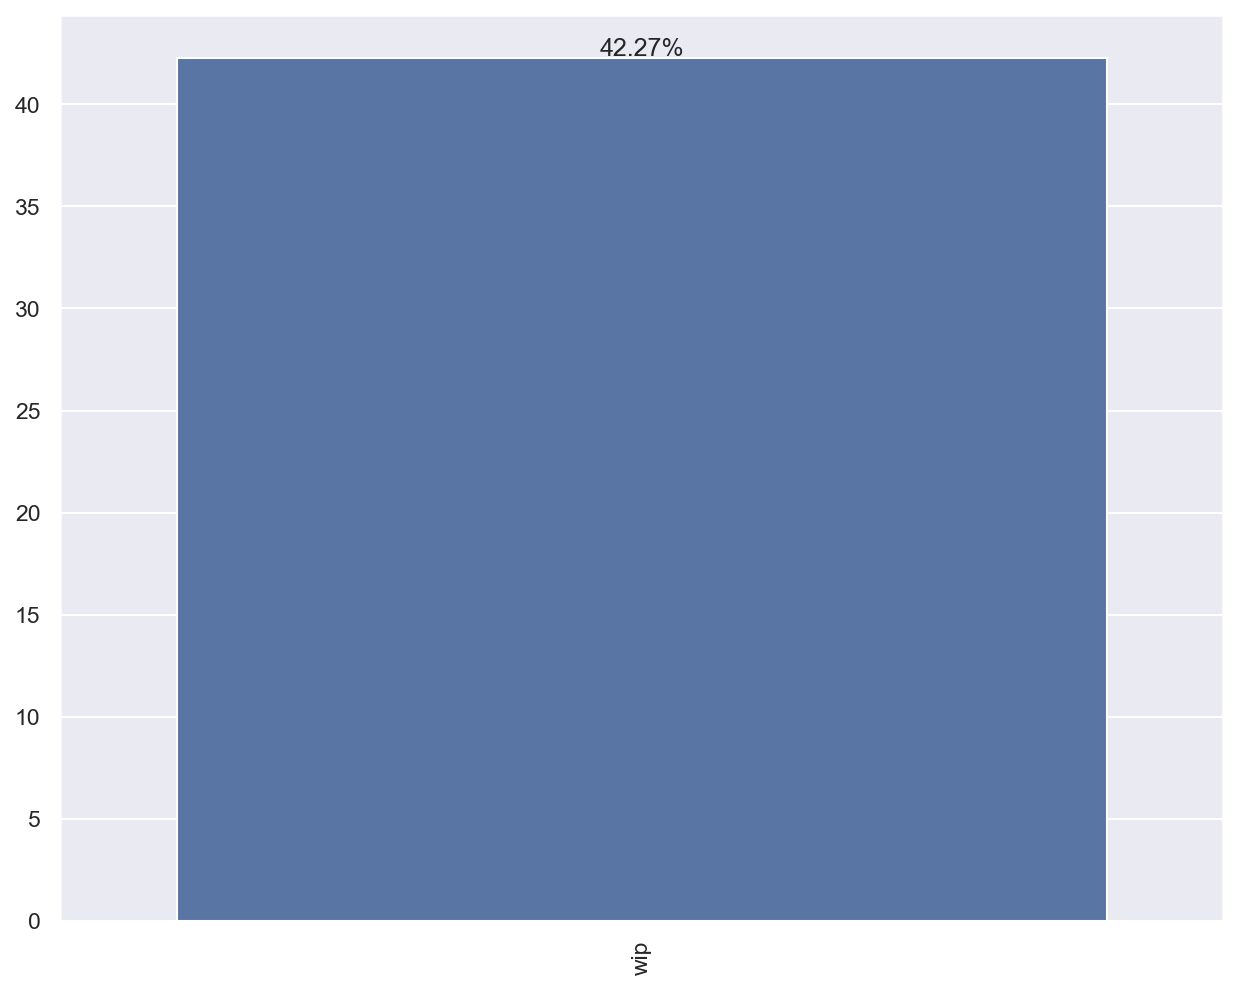

In [60]:
# visualizing missing data of all features as a percentage of the total df
plt.figure(figsize=(10,8),dpi=150)
ax = sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
    s="{}%".format(round(height,2)),
    ha='center')
plt.show()

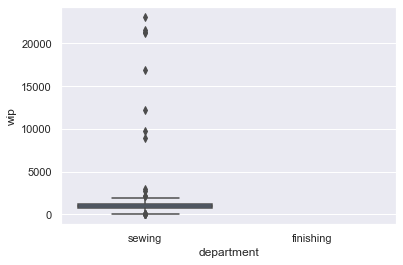

In [63]:
# displaying which department has the most missing mip 
sns.boxplot(x='department',y='wip',data=df)
plt.show()

#### since all of the missing wip data is in the finishing department. We can see that the finishing department is waiting on work from the sewing department and assign 0 for missing wip data in the finishing department

In [64]:
df['wip'] = df['wip'].fillna(0)

In [28]:
# converting the date column into a datetime object
df['date'] = pd.to_datetime(df['date'])

In [29]:
# grabbing the month name
df['month'] = df['date'].dt.month_name()

In [30]:
# converts overtime to hours 
df['overtime_in_hours'] = df['over_time'].apply(lambda x: x/60)

In [31]:
# counts total number of values in each quarter 
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [32]:
# counts the total number of values in each day
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

In [33]:
# counts the total number of values in each month
df['month'].value_counts()

January     542
February    443
March       212
Name: month, dtype: int64

In [34]:
# counts the total number of value for each department
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [35]:
# changes department column to only finsihing or sewing
df['department'] = df['department'].apply(lambda x: 'finishing' if x == ('finishing' or 'finishing') else 'sewing') 

In [36]:
# no longer duplicating deaprtments
df['department'].value_counts()

sewing       948
finishing    249
Name: department, dtype: int64

# EDA

In [37]:
# creates a department df with total counts and rename columns 
department = df['department'].value_counts().reset_index()
department.rename(columns= {'index':'department','department':'total_count'},inplace=True)

In [38]:
department['total_count']

0    948
1    249
Name: total_count, dtype: int64

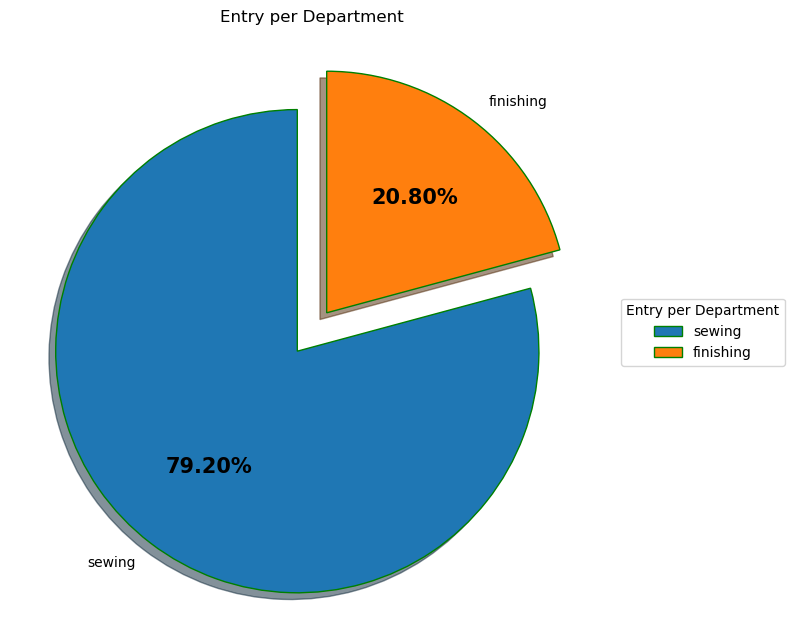

In [39]:
explode=[0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(department['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = department['department'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, department['department'],
          title ="Entry per Department",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Department")
  
# show plot
plt.savefig("Entry_per_Department.png")
plt.show()

In [40]:
# isolating the entries per quarter
quarters = df['quarter'].value_counts().reset_index()
quarters.rename(columns={'index':'quarter','quarter':'total_count'},inplace=True)

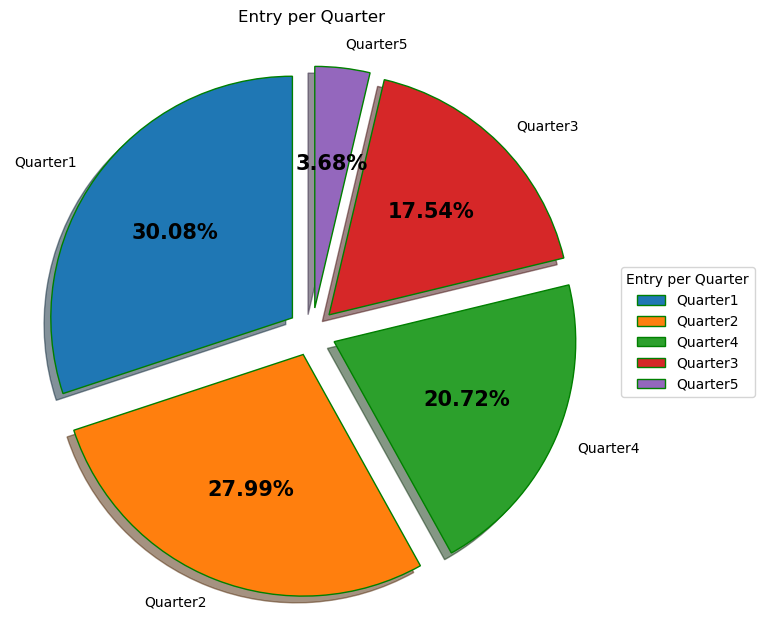

In [41]:
# plotting the number of entries per qaurter 
explode=[0.1,0.1,0.1,0.1,0.1]
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
fig, ax = plt.subplots(figsize =(10, 8),dpi=100)
wedges, texts, autotexts = ax.pie(quarters['total_count'], 
                                  autopct = "%.2f%%",
                                  explode = explode, 
                                  labels = quarters['quarter'],
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp)
  
# Adding legend
ax.legend(wedges, quarters['quarter'],
          title ="Entry per Quarter",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
  
plt.setp(autotexts, size = 15, weight ="bold")
ax.set_title("Entry per Quarter")
  
# show plot
plt.savefig("Entry_per_Quarter.png")
plt.show()


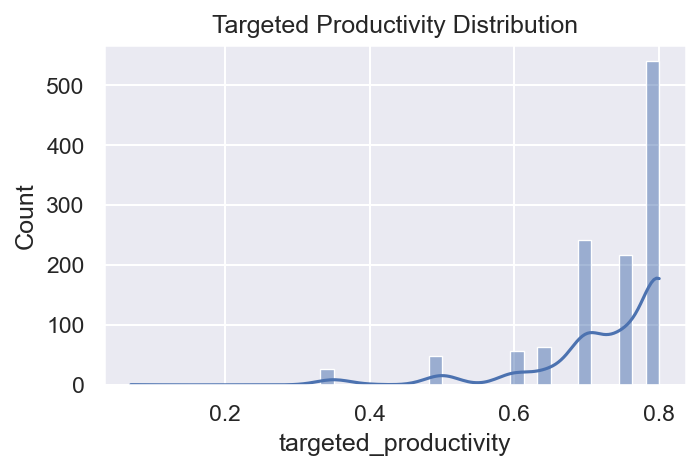

In [42]:
# plotting the distribution of targeted peoductivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['targeted_productivity'],kde=True)
plt.title('Targeted Productivity Distribution')
plt.savefig("Targeted_Productivity_Distribution.png")
plt.show()


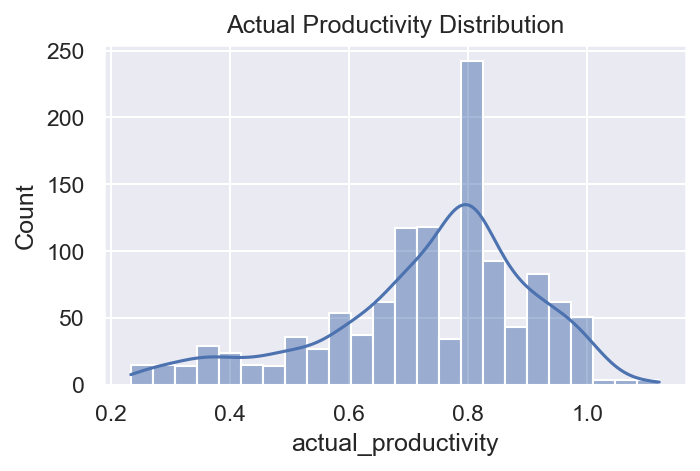

In [43]:
# plotting the distribution of actual productivity 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(5,3),dpi=150)
sns.histplot(data=df['actual_productivity'],kde=True)
plt.title('Actual Productivity Distribution')
plt.savefig("Actual_Productivity_Distribution.png")
plt.show()


In [44]:
#isolating the sum of incentives per month 
incentives = df[['month','incentive']].groupby('month',as_index=False,sort= False).agg({'incentive':'sum'})

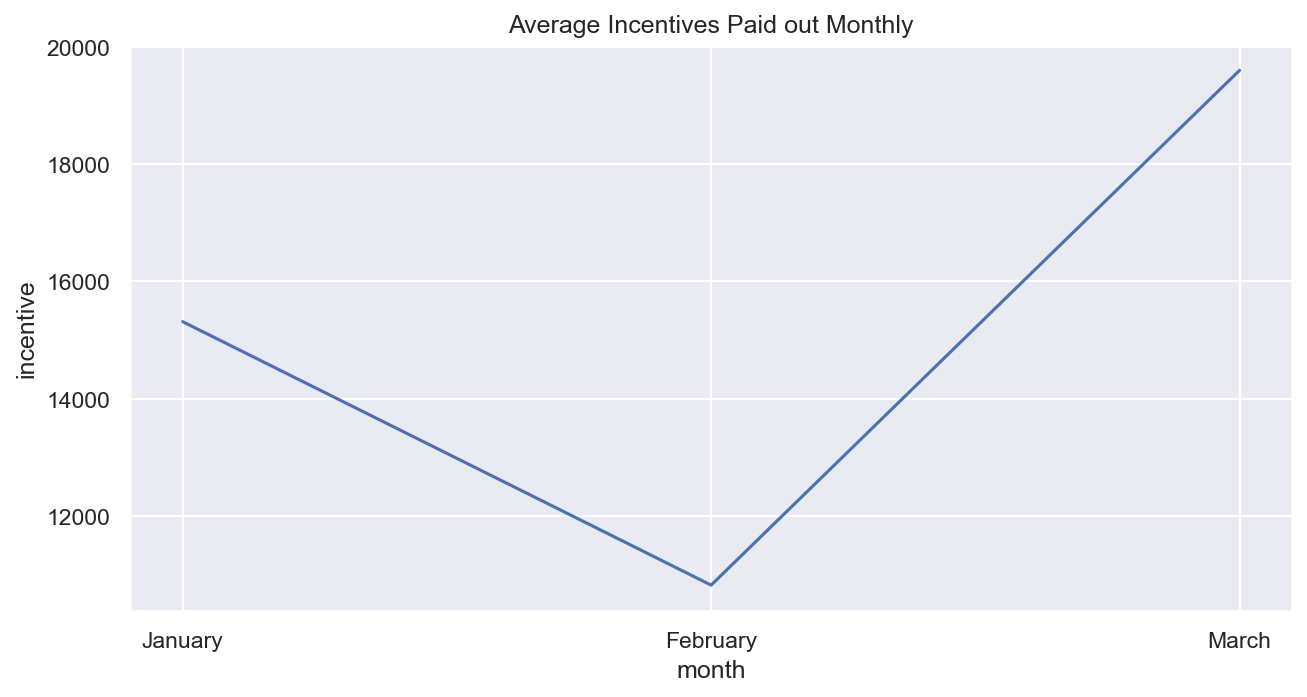

In [45]:
# plotting the average incentives per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=incentives,x='month',y='incentive',
                 palette='Paired',sort=True,markers=True,estimator='mean')
plt.title('Average Incentives Paid out Monthly')
plt.savefig("Average_Incentives_Paid_out_Monthly.png")
plt.show()


In [46]:
# average work in progress per team
work_in_progress_per_team = df[['month','wip','team']].groupby('team',as_index=False).mean()

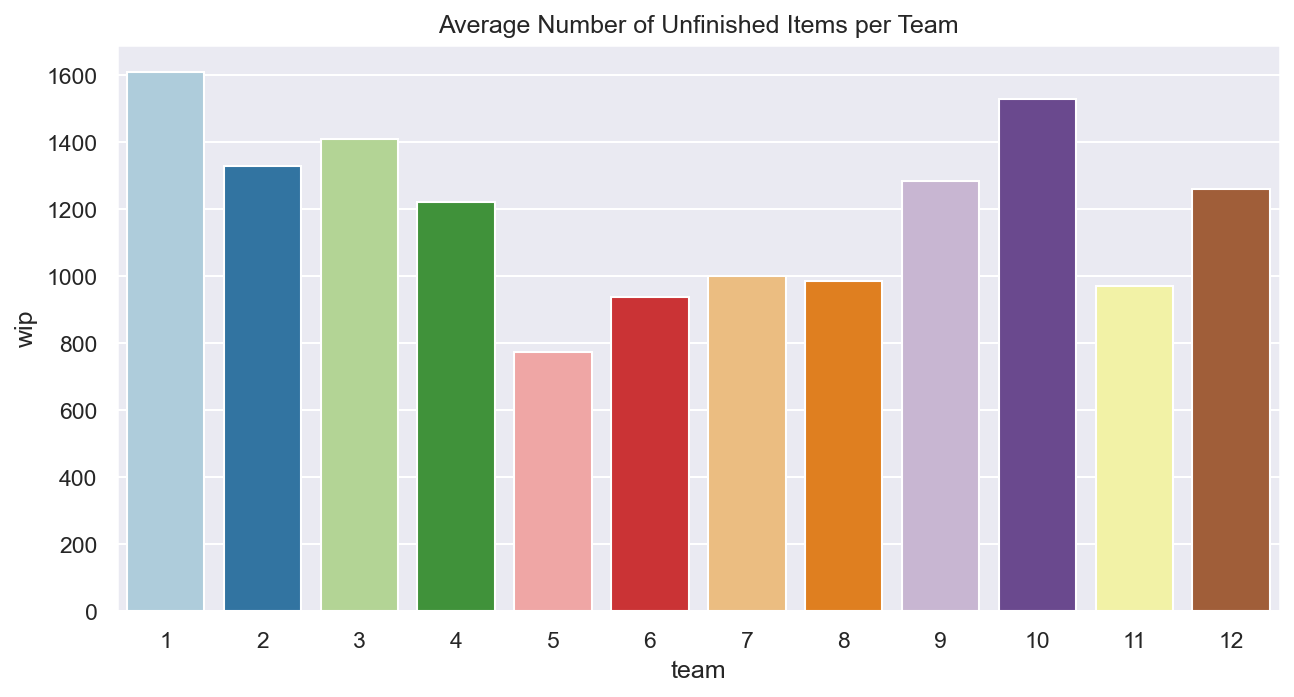

In [47]:
# plotting the average number of unfinished items per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=work_in_progress_per_team,x='team',y='wip',
                 palette='Paired')
plt.title('Average Number of Unfinished Items per Team')
plt.savefig("Average_Number_of_Unfinished_Items_per_Team.png")
plt.show()


In [48]:
# average working in progress per month
work_in_progress_per_month =  df[['month','wip']].groupby('month',sort=False).mean()

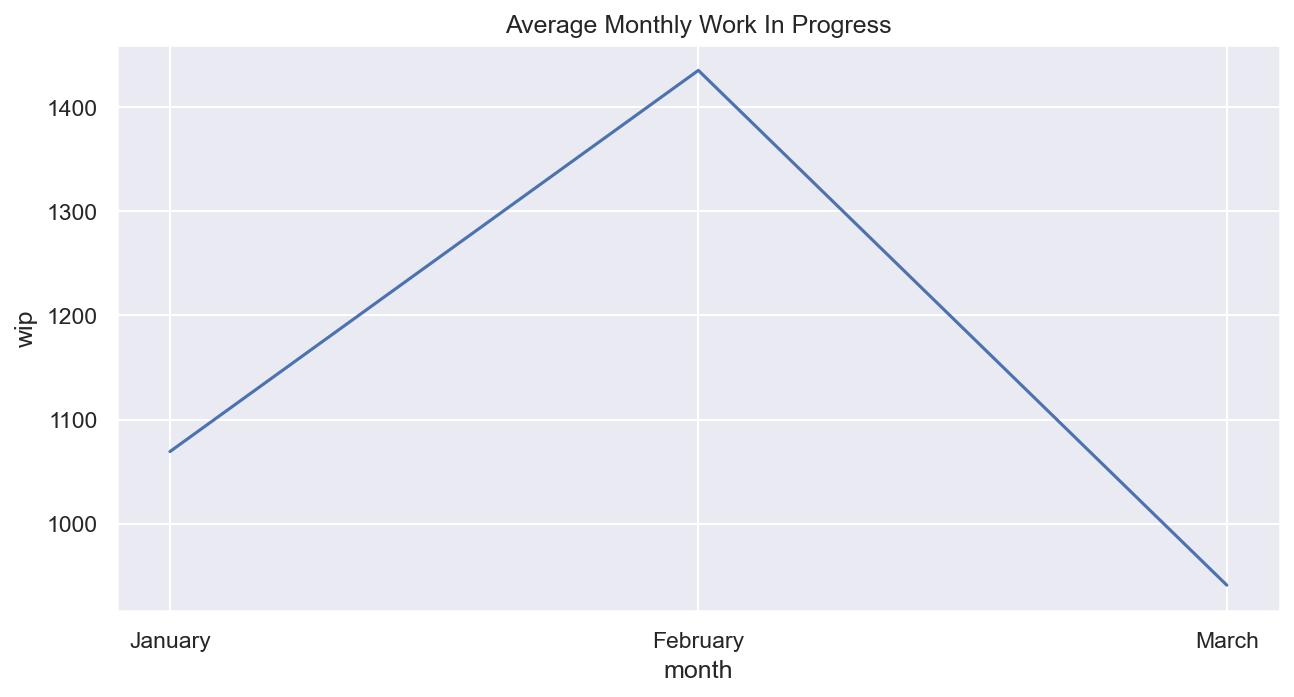

In [49]:
# plotting the average number of unfinished items per month
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=work_in_progress_per_month,x='month',y='wip',
                 palette='Paired',sort=False)
plt.title('Average Monthly Work In Progress')
plt.savefig('Average_Monthly_Work_In_Progress.png')
plt.show()


In [50]:
# average idle men per team
idle_men_per_team = df[['team','idle_men']].groupby('team',as_index=False).agg({'idle_men':'sum'})

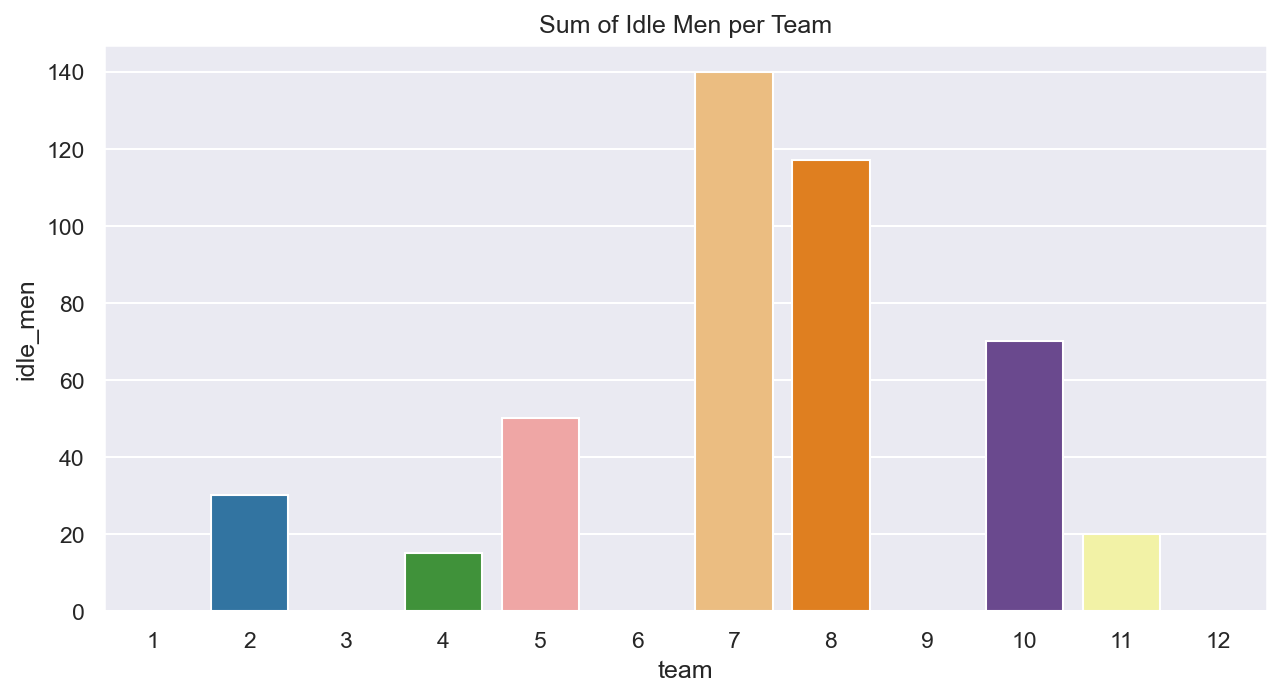

In [51]:
# plotting average idle men per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=idle_men_per_team,x='team',y='idle_men',
                 palette='Paired')
plt.title('Sum of Idle Men per Team')
plt.savefig('Sum_of_Idle_Men_per_Team.png')
plt.show()


In [52]:
# average overtime in hours per team
    
over_time_per_team = df[['team','overtime_in_hours']].groupby('team',
                                            as_index=False).agg({'overtime_in_hours':'mean'})

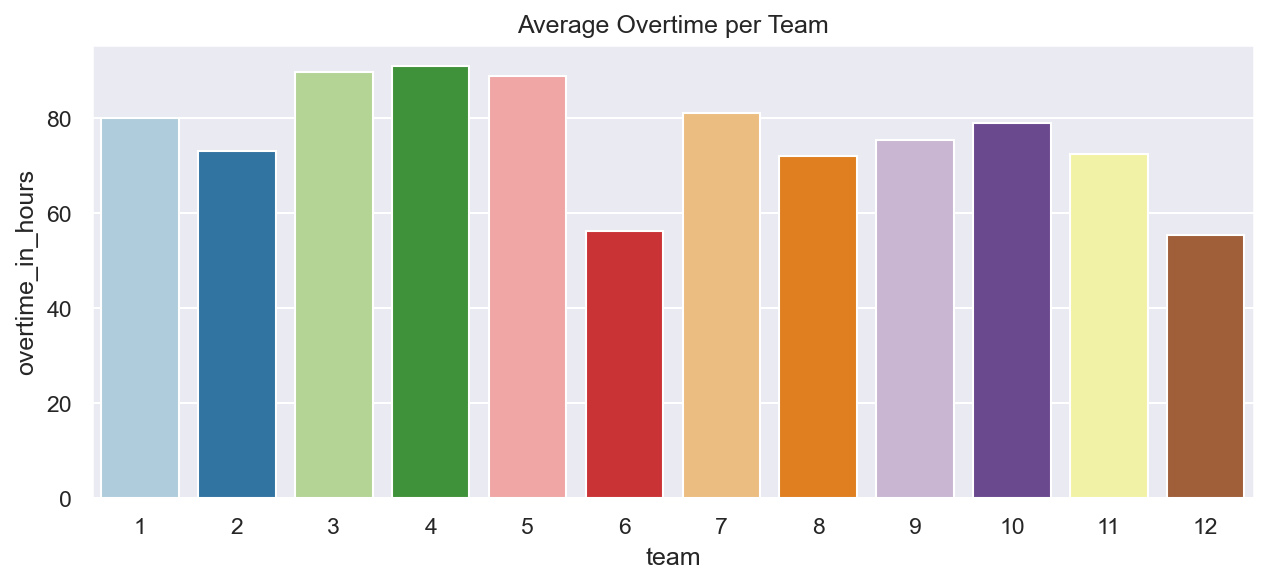

In [53]:
# plotting the average overtime per team 
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,4),dpi=150)
axes = sns.barplot(data=over_time_per_team,x='team',y='overtime_in_hours',
                 palette='Paired')
plt.title('Average Overtime per Team')
plt.savefig('Average_Overtime_per_Team.png')
plt.show()


In [54]:
# sum of incentives per team
incentives_per_team = df[['team','incentive']].groupby('team',
                                                as_index=False).agg({'incentive':'sum'})

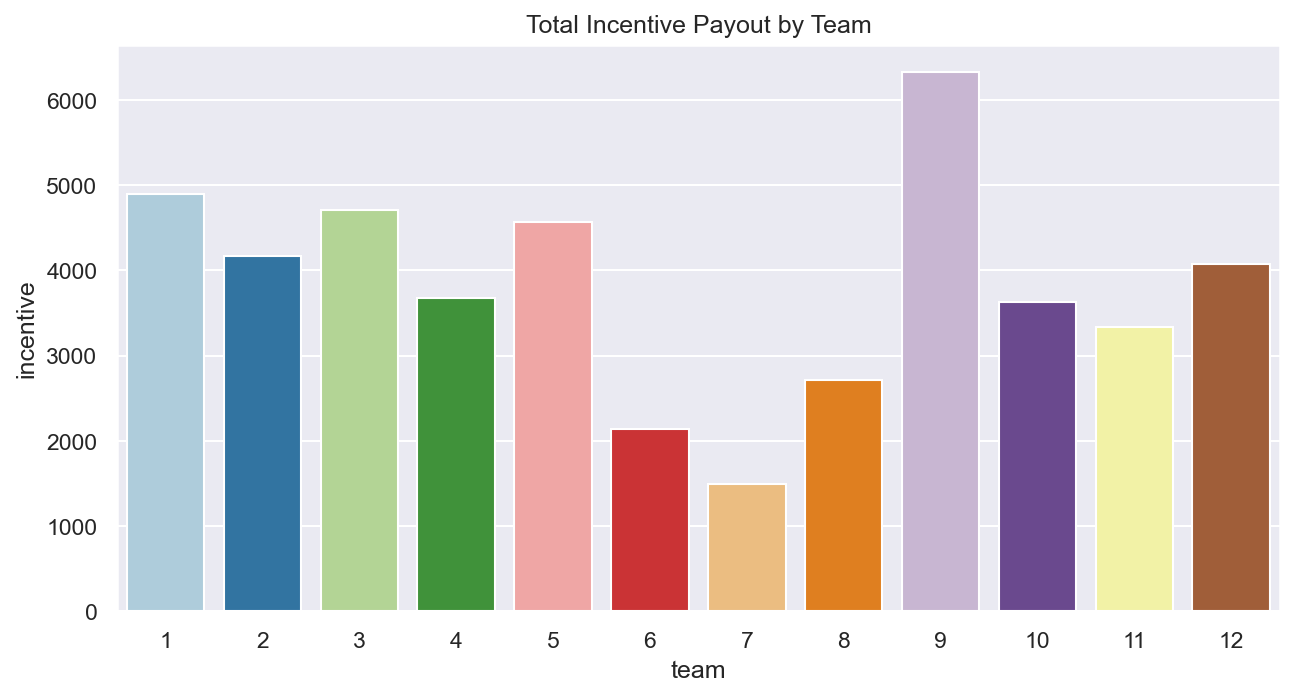

In [55]:
# plotting total incentives per team
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.barplot(data=incentives_per_team,x='team',y='incentive',
                 palette='Paired')
plt.title('Total Incentive Payout by Team')
plt.savefig('Total_Incentive_Payout_by_Team.png')
plt.show()


In [56]:
# average monthly overtime trend 
overtime_per_month = df[['month','overtime_in_hours']].groupby('month',
                                                sort=False).agg({'overtime_in_hours':'mean'})

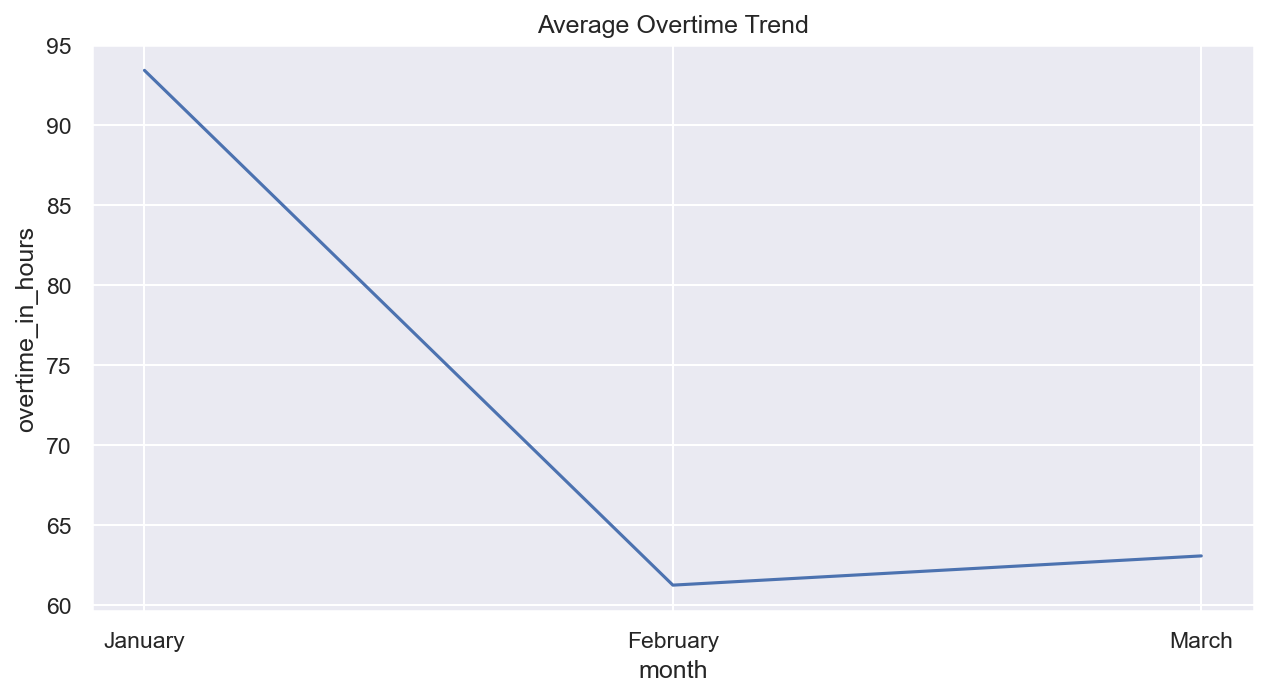

In [57]:
# plotting the average monthly overtime trend
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,5),dpi=150)
axes = sns.lineplot(data=overtime_per_month,x='month',y='overtime_in_hours',
                 palette='Paired',sort=False)
plt.title('Average Overtime Trend')
plt.savefig('Average_Overtime_Trend.png')
plt.show()


In [58]:
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,overtime_in_hours
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January,118.0
1,2015-01-01,Quarter1,sewing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500,January,16.0
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January,61.0
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2015-03-11,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333,March,16.0
1193,2015-03-11,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,16.0
1194,2015-03-11,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625,March,16.0
1195,2015-03-11,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889,March,30.0


# Modling

## Data prep

In [73]:
# the actual productivity column is negatively skewed
df.skew().sort_values()

targeted_productivity    -2.144150
actual_productivity      -0.807492
no_of_workers            -0.111740
team                      0.009848
smv                       0.405937
over_time                 0.673287
overtime_in_hours         0.673287
no_of_style_change        2.942506
idle_men                  9.855079
wip                      10.852386
incentive                15.790746
idle_time                20.545425
dtype: float64

In [75]:
from scipy import stats

In [92]:
# transforming the actual productivity column to be less negatively skewed
boxcox_actual = stats.boxcox(df['actual_productivity'])
box_cox_param = boxcox_actual[1]

boxcox_actual = pd.Series(boxcox_actual[0])

In [93]:
# reassigning actual productivity
df['actual_productivity'] = boxcox_actual

In [94]:
df['actual_productivity'].skew()

-0.1386649762614521

In [96]:
# function that takes in model and training score and stores them in a df
df_model_results=pd.DataFrame(columns=["ModelName","TrainScore"])

def store_model_results(modl_name,train_score):
    global df_model_results
    row_loc=df_model_results.shape[0]+1
    df_model_results.loc[row_loc,["ModelName","TrainScore"]]=[modl_name,train_score]

(1197, 17)

In [70]:
#Run each model and show the combined results.
def show_model_scores(x,y):
    global df_model_results
    df_model_results=df_model_results.iloc[0:0] #reset display dataframe
    for model in  [LinearRegression(),
                   Lasso(),
                   Ridge(),
                   ElasticNet(),
                   XGBRegressor()]:
        store_model_results(model.__class__.__name__, cross_val_score(model,x,y,cv=3).mean())
    df_model_results.sort_values("TrainScore",ascending=False,inplace=True)

In [71]:
# drop the date column